## House Pricing Assignment

### Problem Statement:
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses <I> data analytics</I> to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. It is required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.


The company wants to know about the variables which are significant in predicting the price of a house, and how well those variables describe the price of a house. Also,it is required to determine the optimal value of lambda for ridge and lasso regression.

 

Business Goal: To model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.


In [1]:
# Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso


import warnings
warnings.filterwarnings('ignore')


#### Retrieving data

In [2]:

df = pd.read_csv('train.csv')

#### Visual inspection

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# The columns consisting of more than 5 missing values
df.columns[df.isnull().sum()>5]
   

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'],
      dtype='object')

##### Some of the columns consist of many Null values- LotFrontage , FireplaceQu, Alley, PoolQC, MiscFeature, Fence etc.

In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
df.shape  

(1460, 81)

#### Data Understanding
(Description of some important variables) 

RoofStyle: Type of roof (Flat, Shed etc.)
		
RoofMatl: Roof material (Clay Tile, Metal etc. )
	
Exterior1st: Exterior covering on house (Stone, Cement Board, Hard Board etc)

Exterior2nd: Exterior covering on house (if more than one material) 

ExterQual: Evaluates the quality of the material on the exterior (Poor to Excellent)
		
ExterCond: Evaluates the present condition of the material on the exterior (Poor to Excellent)
		
Foundation: Type of foundation ( Slab, Brick,Stone, Wood etc)
		
BsmtQual: Evaluates the height of the basement (Poor to Excellent)
		
BsmtCond: Evaluates the general condition of the basement(Poor to Excellent)

BsmtExposure: Refers to walkout or garden level walls

BsmtFinType1: Rating of basement finished area
		
BsmtFinType2: Rating of basement finished area (if multiple types)

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating (Floor Furnace, Wall furnace etc)
				
HeatingQC: Heating quality and condition (Poor to Excellent)
		
CentralAir: Central air conditioning (Yes/No)
		
Electrical: Electrical system
		
1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality (Poor to Excellent)
       	
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)
		
Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality (Poor to Excellent)

GarageType: Garage location
		
GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality (Poor to Excellent)
		
GarageCond: Garage condition (Poor to Excellent)
		
PavedDrive: Paved driveway (Paved, Partial Pavement, Dirt/Gravel etc.)
		
WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality (Fair to Excellent)
		
MiscFeature: Miscellaneous feature not covered in other categories

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)
MSSubClass: Identifies the type of dwelling involved in the sale.	

MSZoning: Identifies the general zoning classification of the sale.
		 (e.g. A-Agriculture, C- Commercial )
       
LotFrontage: Linear feet of Street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property -Gravel	and Paved
		
LotShape: General shape of property (Regular, Slightly irregular etc)

LandContour: Flatness of the property
		
Utilities: Type of utilities available Types of public utilities (E,G,W,& S)	
LotConfig: Lot configuration  (Inside, Corner etc)
	
Neighborhood: Physical locations within Ames city limits			
Condition1: Proximity to various conditions
	
BldgType: Type of dwelling (Single-family, Two-family, Duplex)
			
HouseStyle: Style of dwelling ( 1Story, 2Story etc)

OverallQual: Rates the overall material and finish of the house (1 to 10)

OverallCond: Rates the overall condition of the house (1 to 10)

YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)	


##### Data Quality Issues
Various column headings are not clear (not abbreviated properly). Even the Data dictionary is not able to explain the meaning of some of the variable names.

#### Data Visualization for preliminary analysis

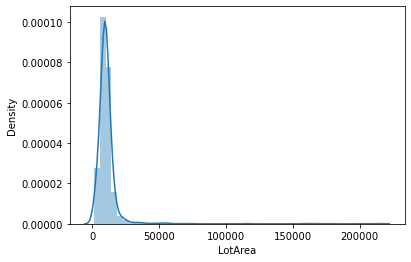

In [8]:
# LotArea: Lot size in square feet
sns.distplot(df['LotArea'])
plt.show()

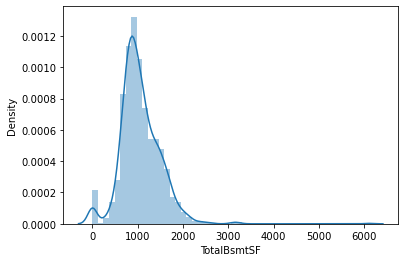

In [9]:
# TotalBsmtSF: Total square feet of basement area
sns.distplot(df['TotalBsmtSF'])
plt.show()

#### Data Cleaning and Manipulation 

In [10]:
#To check the columns and to identify the columns which are nearly empty 
sr=df.isnull().sum(axis=0)
#To identify the columns with more than 90% NaN values
i=sr[sr>len(df.index)*0.9].index 
print(i)
print(round(100*(df.isnull().sum()/len(df.index)),2))

Index(['Alley', 'PoolQC', 'MiscFeature'], dtype='object')
Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 81, dtype: float64


In [11]:
#Removing text from some of the fields and chnging their datatypes:
df['HouseStyle']=df['HouseStyle'].str.replace('Story','')
df['HouseStyle']=df['HouseStyle'].str.replace('Fin','')
df['HouseStyle']=df['HouseStyle'].str.replace('Unf','')
df['HouseStyle']=df['HouseStyle'].str.replace('SLvl','3') #Assuming a bigger value
df['HouseStyle']=df['HouseStyle'].str.replace('SFoyer','4') #Assuming a bigger value

#Changing the data type of HouseStyle to float
df['HouseStyle']=df['HouseStyle'].astype("float")
print(df.HouseStyle.head())




0    2.0
1    1.0
2    2.0
3    2.0
4    2.0
Name: HouseStyle, dtype: float64


#### Mapping of values

In [12]:
#Defining the function for mapping of ratings to a number
def rating_map(x):
    return x.map({'Po':'1', 'Fa':'2','TA': '3','Gd':'4','Ex':'5'})

varlist=['GarageQual','GarageCond','KitchenQual','HeatingQC','BsmtCond','BsmtQual','ExterQual','ExterCond','FireplaceQu']

# Applying the function to the multiple columns of the dataframe
df[varlist] = df[varlist].apply(rating_map)

#Replacing NaN values by 0
df[varlist]=df[varlist].fillna(0)

#Changing the data type to int
df[varlist]=df[varlist].astype("int")
print(df[varlist].head(10))


   GarageQual  GarageCond  KitchenQual  HeatingQC  BsmtCond  BsmtQual  \
0           3           3            4          5         3         4   
1           3           3            3          5         3         4   
2           3           3            4          5         3         4   
3           3           3            4          4         4         3   
4           3           3            4          5         3         4   
5           3           3            3          5         3         4   
6           3           3            4          5         3         5   
7           3           3            3          5         3         4   
8           2           3            3          4         3         3   
9           4           3            3          5         3         3   

   ExterQual  ExterCond  FireplaceQu  
0          4          3            0  
1          3          3            3  
2          4          3            3  
3          3          3            4  
4

In [13]:
def binary_map(x):
    return x.map({'Y':1,'N':0})
varlist=['PavedDrive','CentralAir']

# Applying the function to the bikes dataframe
df[varlist] = df[varlist].apply(binary_map)

#Replacing NaN values by 0
df[varlist]=df[varlist].fillna(0)

#Changing the data type to int
df[varlist]=df[varlist].astype("int")
print(df[varlist].head())



   PavedDrive  CentralAir
0           1           1
1           1           1
2           1           1
3           1           1
4           1           1


#### Dummy Variable creation

In [14]:
#Creating dummy variables
varlist=['LotShape','LotConfig','Neighborhood','Condition1','BldgType','HouseStyle','RoofStyle','Exterior1st','Exterior2nd','MasVnrType','Foundation','GarageType','GarageFinish','SaleCondition']
dumy_list = pd.get_dummies(df[varlist],drop_first=True)
print(dumy_list.head())

   HouseStyle  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  \
0         2.0             0             0             1                  0   
1         1.0             0             0             1                  0   
2         2.0             0             0             0                  0   
3         2.0             0             0             0                  0   
4         2.0             0             0             0                  0   

   LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  Neighborhood_Blueste  \
0              0              0                 1                     0   
1              1              0                 0                     0   
2              0              0                 1                     0   
3              0              0                 0                     0   
4              1              0                 0                     0   

   Neighborhood_BrDale  ...  GarageType_BuiltIn  GarageType_CarPort  \
0        

In [15]:
#Adding the dummy columns to the dataframe and removing the original columns

df = pd.concat([df, dumy_list], axis = 1)

df.drop(varlist, axis = 1, inplace = True)
print(df.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LandContour  \
0   1          60       RL         65.0     8450   Pave   NaN         Lvl   
1   2          20       RL         80.0     9600   Pave   NaN         Lvl   
2   3          60       RL         68.0    11250   Pave   NaN         Lvl   
3   4          70       RL         60.0     9550   Pave   NaN         Lvl   
4   5          60       RL         84.0    14260   Pave   NaN         Lvl   

  Utilities LandSlope  ... GarageType_BuiltIn  GarageType_CarPort  \
0    AllPub       Gtl  ...                  0                   0   
1    AllPub       Gtl  ...                  0                   0   
2    AllPub       Gtl  ...                  0                   0   
3    AllPub       Gtl  ...                  0                   0   
4    AllPub       Gtl  ...                  0                   0   

   GarageType_Detchd  GarageFinish_RFn  GarageFinish_Unf  \
0                  0                 1                 0   
1 

In [16]:
#Rescaling is to be done so that the units of the coefficients obtained are all on the same scale.
scaler = MinMaxScaler()

#Only numeric variales are kept excluding 'yes/no', '0/1' and dummy variables
numeric_vars = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','SalePrice']

df[numeric_vars] = scaler.fit_transform(df[numeric_vars])
print(df[numeric_vars].head())

    LotArea  MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  SalePrice
0  0.033420     0.12250    0.125089   0.064212     0.140098   0.241078
1  0.038795     0.00000    0.173281   0.121575     0.206547   0.203583
2  0.046507     0.10125    0.086109   0.185788     0.150573   0.261908
3  0.038561     0.00000    0.038271   0.231164     0.123732   0.145952
4  0.060576     0.21875    0.116052   0.209760     0.187398   0.298709


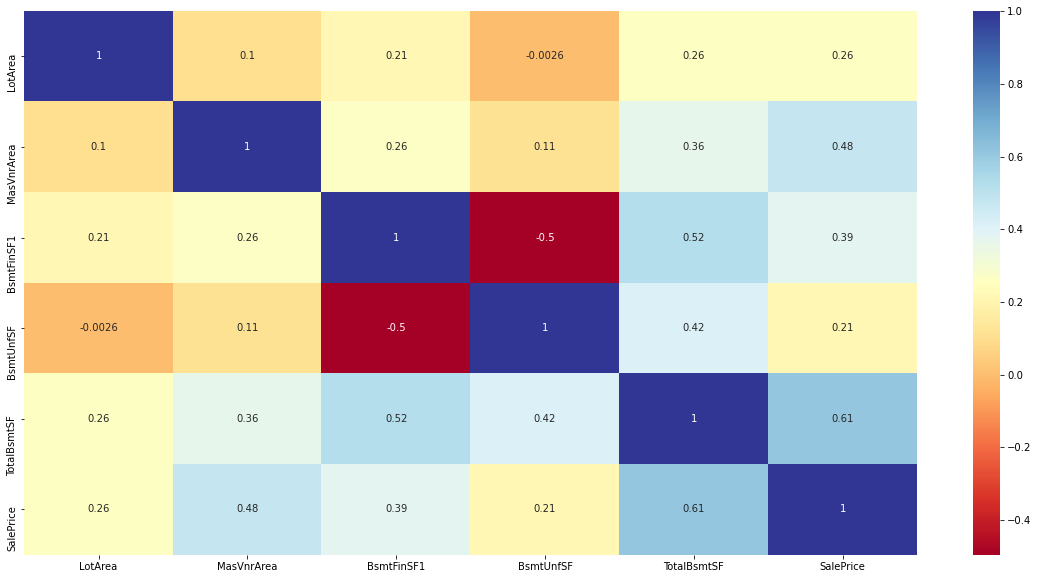

In [17]:
#Generating a Heat Map (map of correlations) for the numeric variables
plt.figure(figsize = (20, 10))
sns.heatmap(df[numeric_vars].corr(), annot = True, cmap="RdYlBu")
plt.show()

#### Feature Selection using RFE (Recursive Feature Elimination) approach

In [18]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# To keep the same rows in the train and test data sets always
from sklearn.model_selection import train_test_split

df=df.fillna(0)

df1=pd.DataFrame(df)
cols=df1.columns
for c in cols:
    if df1[c].dtype=="object":
        df1=df1.drop(c,axis=1)

X = df1.iloc[:,:] # predictors in variable X
X=X.drop('SalePrice',axis=1)
y = df1.loc[:,'SalePrice'] # response variable in Y
        

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size = 0.3,random_state=100)

lm = LinearRegression()
lm.fit(X_train, y_train)

#To determine top 70 features
rfe = RFE(lm, 70)             # running RFE
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('Id', False, 75),
 ('MSSubClass', False, 52),
 ('LotFrontage', False, 59),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', False, 13),
 ('YearBuilt', False, 54),
 ('YearRemodAdd', False, 64),
 ('MasVnrArea', True, 1),
 ('ExterQual', True, 1),
 ('ExterCond', False, 38),
 ('BsmtQual', False, 2),
 ('BsmtCond', False, 4),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 73),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 44),
 ('CentralAir', False, 46),
 ('1stFlrSF', False, 62),
 ('2ndFlrSF', False, 63),
 ('LowQualFinSF', False, 60),
 ('GrLivArea', False, 61),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', True, 1),
 ('FullBath', True, 1),
 ('HalfBath', True, 1),
 ('BedroomAbvGr', False, 30),
 ('KitchenAbvGr', True, 1),
 ('KitchenQual', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', False, 8),
 ('FireplaceQu', False, 47),
 ('GarageYrBlt', False, 66),
 ('GarageCars', True, 1),
 ('GarageArea', False, 72),
 ('GarageQual', True, 1),
 ('Gara

In [19]:
# Displaying the columns which are supported by RFE
supported_cols = X_train.columns[rfe.support_]
print(supported_cols)


Index(['LotArea', 'OverallQual', 'MasVnrArea', 'ExterQual', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'GarageCars',
       'GarageQual', 'GarageCond', 'LotShape_IR3', 'LotConfig_CulDSac',
       'LotConfig_FR2', 'LotConfig_FR3', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_MeadowV', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_SWISU', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Veenker', 'Condition1_Norm', 'Condition1_PosA',
       'Condition1_RRAe', 'Condition1_RRAn', 'BldgType_2fmCon',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'RoofStyle_Shed', 'Exterior1st_AsphShn', 'Exterior1st_BrkFace',
       'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_ImStucc',
       'Exterior1st_MetalSd', 'Exterior1st_Stone', 'E

In [20]:
supported_cols=supported_cols=['LotArea', 'OverallQual', 'MasVnrArea', 'ExterQual', 'BsmtFinSF1',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'KitchenQual', 'GarageCars', 'GarageQual', 'GarageCond', 'LotShape_IR3',
       'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor',
       'Neighborhood_MeadowV', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_SWISU', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Veenker', 'Condition1_Norm', 'Condition1_PosA',
       'Condition1_RRAe', 'Condition1_RRAn', 'BldgType_2fmCon',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'RoofStyle_Shed', 'Exterior1st_AsphShn', 'Exterior1st_BrkFace',
       'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_ImStucc',
       'Exterior1st_Stone', 'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn',
       'Exterior2nd_BrkFace', 'Exterior2nd_CBlock', 'Exterior2nd_CmentBd',
       'Exterior2nd_ImStucc', 'Exterior2nd_Stucco', 'Exterior2nd_Wd Shng',
       'MasVnrType_None', 'Foundation_CBlock', 'Foundation_Slab',
       'Foundation_Stone', 'Foundation_Wood', 'GarageFinish_RFn',
       'GarageFinish_Unf', 'SaleCondition_AdjLand', 'SaleCondition_Partial']

### Model Building and Evaluation

In [21]:
X_train=X_train[supported_cols]
X_test=X_test[supported_cols]


### Linear Regression Model


In [22]:
# Instantiate the Linear Regression Model object
lm = LinearRegression()

# Fit a line using the above object
lm.fit(X_train, y_train)

LinearRegression()

In [23]:
# Display the coefficients and the intercept
print(lm.intercept_)
print(lm.coef_)

-0.19587754814141226
[ 1.69781276e-01  2.33261112e-02  7.17762153e-02  1.10155321e-02
  5.70903070e-02  1.67342559e-01  1.70559564e-02  1.69520603e-02
  3.01787015e-02  2.08351533e-02  1.74622867e-02  1.98569701e-02
  1.34202551e-02 -1.53644534e-02 -5.01985168e-02  1.84002107e-02
 -2.06445599e-02 -3.45070033e-02  1.18480344e-02  1.90990987e-02
  5.58235872e-02  2.65531801e-02  9.37420273e-02  6.89217319e-02
  2.74961172e-02  1.95891639e-02  4.32322061e-02  4.47281765e-02
  1.13769937e-02  1.38221754e-02 -2.03644171e-02  1.92173178e-02
 -1.66721782e-02 -2.89987395e-02 -5.53535823e-02 -4.10058499e-02
  3.65816973e-02  1.95321458e+12  3.09661904e-02 -1.12381995e+12
 -5.17703199e-02 -1.40255565e-01  2.67994450e-02 -1.95321458e+12
 -1.78031444e-02 -2.03977504e-02  1.12381995e+12  6.09847502e-02
  5.95733258e-02 -2.84084362e-02 -2.04932560e-02  1.09977242e-02
  1.17253978e-02  3.25624322e-02  4.73014103e-02  2.55315534e-02
 -1.78313140e-02 -1.42844651e-02  1.85775195e-02  1.18682045e-02]


###### Determining metrics for the Linear model 

In [24]:
# Generating the predicted values by the model for training and test data
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

# Determining the r2_score, rss and mse values by the model 
# for training as well as test data

#calculating r2_score
metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_score for training data ",r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_score for testing data ",r2_test_lr)
metric.append(r2_test_lr)

#calculating residual sum of square (rss)
rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("rss for training data ",rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("rss for testing data ",rss2_lr)
metric.append(rss2_lr)

#calculating mean squared error
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("mse for training data ",mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("mse for testing data ",mse_test_lr)
metric.append(mse_test_lr**0.5)

r2_score for training data  0.8416676312881833
r2_score for testing data  -1.4036691198309659e+24
rss for training data  1.9482843027303485
rss for testing data  7.630094380095816e+24
mse for training data  0.0019082118538005371
mse for testing data  1.7420306803871726e+22


<Font color="Orange" >As the r2_score is acceptable for the Training data but not acceptable for the Test data <Font>

### <Font color="Red"> Ridge Regression Model </Font>


In [25]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# list of alphas to tune - if value too high it will lead to underfitting,
# if it is too low, it will not handle the overfitting
params = {'alpha': [0.00001,0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()


folds = 8 
# Used for cross validation i.e. Validating data in different combinations
model_cv = GridSearchCV(estimator = ridge, param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(X_train, y_train) 


Fitting 8 folds for each of 29 candidates, totalling 232 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 232 out of 232 | elapsed:    2.0s finished


GridSearchCV(cv=8, estimator=Ridge(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20,
                                   50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [26]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.8}


In [27]:
#Fitting Ridge model for alpha = 0.8 and printing coefficients which have been penalised
alpha = model_cv.best_params_['alpha']
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 0.11872918  0.02442839  0.07201147  0.01178368  0.05802939  0.13392946
  0.01813785  0.01689752  0.0301426   0.01994954  0.01771844  0.02059957
  0.01174177 -0.01380551 -0.03731099  0.01908949 -0.01971696 -0.02737832
  0.01172288  0.02392273  0.0542097   0.02122566  0.08917019  0.06575992
  0.02624689  0.01787204  0.03903138  0.04097505  0.01162244  0.01311672
 -0.01961876  0.01688511 -0.01229997 -0.02545174 -0.05594903 -0.04139218
  0.02667093  0.00147498  0.03035476  0.01532758 -0.02710382 -0.07204356
  0.02044551  0.00147498 -0.01522843 -0.01468172  0.01532758  0.0360872
  0.0466043  -0.02477205 -0.02169203  0.01082893  0.0129224   0.0272527
  0.03332032  0.01863205 -0.01808987 -0.01497538  0.01337799  0.01345545]


#### Determining metrics for the Ridge model

In [28]:
# Generating the predicted values by the model for training and test data
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

# Determining the r2_score, rss and mse values by the model 
# for training as well as test data

#Calculating r2_score

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_score for training data ",r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_score for testing data ",r2_test_lr)
metric2.append(r2_test_lr)

#Calculating rss
rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("rss for training data ",rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("rss for testing data ",rss2_lr)
metric2.append(rss2_lr)

#Calculating mss
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("mse for training data ",mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("mse for testing data ",mse_test_lr)
metric2.append(mse_test_lr**0.5)

r2_score for training data  0.840304336177706
r2_score for testing data  0.8237512180407998
rss for training data  1.9650596878606414
rss for testing data  0.9580568680513333
mse for training data  0.0019246422016264853
mse for testing data  0.0021873444476057835


<Font color="Orange" >The r2_score is acceptable for the Training and the Test data </Font>

#### Doubling the alpha value for the Ridge regression model

In [29]:
#Fitting Ridge model for alpha = 0.8 * 2 and displaying the coefficients which have been penalised
alpha = 0.8*2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

# Generating the predicted values by the model for training and test data
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

# Determining the r2_score, rss and mse values by the model 
# for training as well as test data

#Calculating r2_score

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_score for training data ",r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_score for testing data ",r2_test_lr)
metric2.append(r2_test_lr)

#Calculating rss
rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("rss for training data ",rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("rss for testing data ",rss2_lr)
metric2.append(rss2_lr)

#Calculating mss
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("mse for training data ",mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("mse for testing data ",mse_test_lr)
metric2.append(mse_test_lr**0.5)

[ 0.09248482  0.02514442  0.06940863  0.01227338  0.05575013  0.11229135
  0.01897941  0.01647678  0.03007383  0.01931533  0.0178313   0.02122092
  0.01096951 -0.01316216 -0.0297111   0.01951163 -0.01892825 -0.0228588
  0.01115973  0.02602678  0.05253349  0.01763723  0.0868595   0.06371635
  0.02476624  0.01586404  0.03538115  0.03764454  0.01157278  0.0124287
 -0.01814898  0.01506336 -0.01039992 -0.02374864 -0.05557074 -0.0415527
  0.02088249 -0.00011539  0.02940142  0.01223324 -0.01646759 -0.04677116
  0.01628659 -0.00011539 -0.01313918 -0.01060196  0.01223324  0.02654068
  0.04024771 -0.0225054  -0.02129455  0.01033452  0.01347516  0.02279921
  0.02580013  0.01495407 -0.01819234 -0.01540186  0.01008561  0.01396401]
r2_score for training data  0.838385789960715
r2_score for testing data  0.8224503253735966
rss for training data  1.9886674536575988
rss for testing data  0.9651282880098555
mse for training data  0.0019477644012317323
mse for testing data  0.0022034892420316338


### <Font color="Blue" >Lasso Regression Model </Font>

In [30]:
lasso = Lasso()
folds = 8
# Used for cross validation i.e. Validating data in different combinations
model_cv = GridSearchCV(estimator = lasso, param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(X_train, y_train)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 8 folds for each of 29 candidates, totalling 232 fits


[Parallel(n_jobs=1)]: Done 232 out of 232 | elapsed:    1.8s finished


GridSearchCV(cv=8, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20,
                                   50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [31]:
# Displaying the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [32]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha=0.0001 
alpha = model_cv.best_params_['alpha']

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 


Lasso(alpha=0.0001)

In [33]:
lasso.coef_

array([ 1.13359387e-01,  2.48815277e-02,  6.95950768e-02,  1.15536153e-02,
        4.21548024e-02,  1.44785311e-01,  1.78903081e-02,  1.42904620e-02,
        2.83526447e-02,  1.97438503e-02,  1.80824204e-02,  2.03747034e-02,
        6.22303434e-03, -7.67635189e-03, -2.83095913e-02,  1.87014369e-02,
       -1.54807603e-02, -0.00000000e+00,  7.26845052e-03,  2.30455270e-02,
        5.17887816e-02,  6.62286931e-03,  8.62377221e-02,  6.13033965e-02,
        1.79088465e-02,  1.35196297e-02,  3.06098580e-02,  3.04431921e-02,
        9.42403192e-03,  0.00000000e+00, -1.38019081e-02,  8.72997343e-03,
       -3.87402256e-03, -1.99928182e-02, -5.19963746e-02, -3.99164119e-02,
        0.00000000e+00,  0.00000000e+00,  2.13398736e-02,  0.00000000e+00,
        0.00000000e+00, -8.38147256e-03,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  1.19199766e-02,
        3.04744395e-02, -1.84310206e-02, -1.72029981e-02,  1.04419188e-02,
        1.11166310e-02,  

#### Determining metrics for the Lasso Regression model

In [34]:

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_score for training data ",r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_score for testing data ",r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)



r2_score for training data  0.8357552577963208
r2_score for testing data  0.8246434662442312
2.02103622679864
0.9532067663382789
0.001979467411164192
0.002176271156023468


### <Font color="Green"> A table which contains all the metrics related to Linear, Ridge and Lasso Regression models </Font>

In [35]:
# The following table contains all the metrics

lr_table = {'Metric': ['r2 Score (Train)','r2 Score (Test)','RSS (Train)','RSS (Test)',
            'MSE (Train)','MSE (Test)'], 'Linear Regression': metric}

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,r2 Score (Train),8.416676e-01,0.838386,0.835755
1,r2 Score (Test),-1.403669e+24,0.822450,0.824643
2,RSS (Train),1.948284e+00,1.988667,2.021036
3,RSS (Test),7.630094e+24,0.965128,0.953207
4,MSE (Train),4.368308e-02,0.044133,0.044491
5,MSE (Test),1.319860e+11,0.046941,0.046651


### Checking the effect of doubling the alpha value for Lasso regressions

In [36]:
alpha=0.0001 *2
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
print(lasso.coef_)

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_score for training data ",r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_score for testing data ",r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)


[ 0.06163708  0.02628856  0.06235908  0.01144997  0.0284042   0.12053198
  0.01974922  0.01267863  0.02801786  0.01842147  0.01826995  0.02103775
  0.00134569 -0.00280559 -0.00473858  0.01870344 -0.01113615 -0.
  0.0041068   0.02367198  0.0465275   0.          0.08437391  0.05656767
  0.00977705  0.00840235  0.01917118  0.02000901  0.00871794  0.
 -0.00430069  0.         -0.         -0.01489164 -0.04993561 -0.03787969
  0.         -0.          0.02164504  0.          0.         -0.
  0.         -0.         -0.         -0.          0.          0.01163344
  0.01600207 -0.01144961 -0.01397917  0.00882593  0.01109488  0.0070511
  0.          0.         -0.01730559 -0.01587241  0.          0.01205299]
r2_score for training data  0.8291908383641476
r2_score for testing data  0.8160356691011377
2.1018115947180016
0.9999972126611507
0.002058581385619982
0.002283098659043723


### Predicting important predictor variables (using Ridge Regression Model)

In [37]:
print(np.sort(ridge.coef_))

[-0.05557074 -0.04677116 -0.0415527  -0.0297111  -0.02374864 -0.0228588
 -0.0225054  -0.02129455 -0.01892825 -0.01819234 -0.01814898 -0.01646759
 -0.01540186 -0.01316216 -0.01313918 -0.01060196 -0.01039992 -0.00011539
 -0.00011539  0.01008561  0.01033452  0.01096951  0.01115973  0.01157278
  0.01223324  0.01223324  0.01227338  0.0124287   0.01347516  0.01396401
  0.01495407  0.01506336  0.01586404  0.01628659  0.01647678  0.01763723
  0.0178313   0.01897941  0.01931533  0.01951163  0.02088249  0.02122092
  0.02279921  0.02476624  0.02514442  0.02580013  0.02602678  0.02654068
  0.02940142  0.03007383  0.03538115  0.03764454  0.04024771  0.05253349
  0.05575013  0.06371635  0.06940863  0.0868595   0.09248482  0.11229135]


In [38]:
predictors = X_train.columns
 
coef = pd.Series(ridge.coef_.flatten(),predictors).sort_values()
print(coef)


BldgType_Twnhs          -0.055571
Exterior1st_ImStucc     -0.046771
BldgType_TwnhsE         -0.041553
LotShape_IR3            -0.029711
BldgType_Duplex         -0.023749
LotConfig_FR3           -0.022859
Exterior2nd_Stucco      -0.022505
Exterior2nd_Wd Shng     -0.021295
LotConfig_FR2           -0.018928
GarageFinish_RFn        -0.018192
Condition1_RRAe         -0.018149
Exterior1st_CemntBd     -0.016468
GarageFinish_Unf        -0.015402
GarageCond              -0.013162
Exterior2nd_Brk Cmn     -0.013139
Exterior2nd_BrkFace     -0.010602
BldgType_2fmCon         -0.010400
Exterior1st_AsphShn     -0.000115
Exterior2nd_AsphShn     -0.000115
SaleCondition_AdjLand    0.010086
MasVnrType_None          0.010335
GarageQual               0.010970
Neighborhood_BrkSide     0.011160
Condition1_Norm          0.011573
Exterior2nd_CBlock       0.012233
Exterior1st_CBlock       0.012233
ExterQual                0.012273
Condition1_PosA          0.012429
Foundation_CBlock        0.013475
SaleCondition_

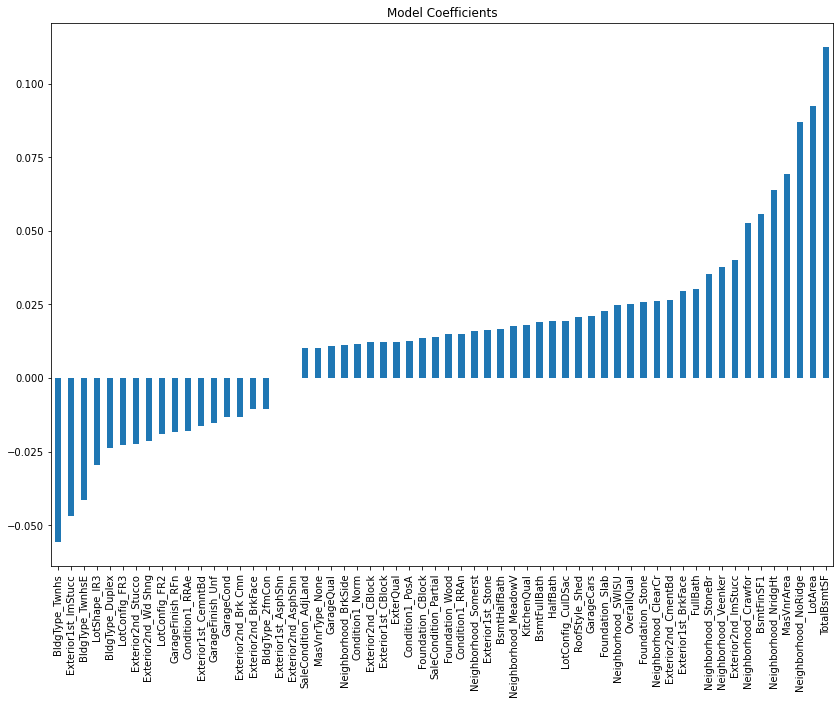

In [40]:
plt.figure(figsize=(14,10))
coef.plot(kind='bar', title='Model Coefficients')
plt.show()

#### Rebuilding the model after eliminating the top five predictors

In [46]:
X = df1.iloc[:,:] # predictors in variable X
X=X.drop(['SalePrice','SaleCondition_Partial','SaleCondition_AdjLand', 'GarageFinish_Unf','GarageFinish_RFn','Foundation_Wood'],axis=1)
y = df1.loc[:,'SalePrice'] # response variable in Y


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size = 0.3,random_state=100)

lm = LinearRegression()
lm.fit(X_train, y_train)

#To determine top 70 features
rfe = RFE(lm, 70)             # running RFE
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

supported_cols = X_train.columns[rfe.support_]

params = {'alpha': [0.00001,0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()


folds = 8 
# Used for cross validation i.e. Validating data in different combinations
model_cv = GridSearchCV(estimator = ridge, param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(X_train, y_train) 

alpha = model_cv.best_params_['alpha']
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

Fitting 8 folds for each of 29 candidates, totalling 232 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 232 out of 232 | elapsed:    2.8s finished


In [48]:
#Getting the top five predictors after rebuilding the model
predictors = X_train.columns
coef = pd.Series(ridge.coef_.flatten(),predictors).sort_values()
print(coef.tail())

GarageCars              0.016616
MasVnrArea              0.017436
BsmtFullBath            0.018468
Neighborhood_NoRidge    0.031134
Neighborhood_NridgHt    0.032039
dtype: float64
